### Importing necessary Libraries

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploring and analyzing the dataset

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


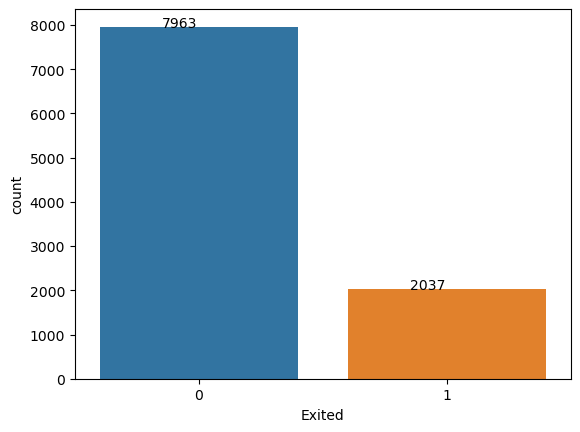

In [6]:
ax = sns.countplot(x=df['Exited'], data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+.3))


In [7]:
df.corr()['Exited'].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

C:\Users\sifta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

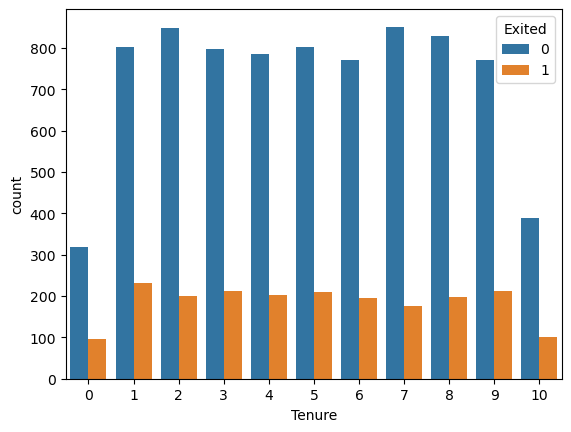

In [8]:
sns.countplot(df['Tenure'],hue=df['Exited'],data=df)

C:\Users\sifta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

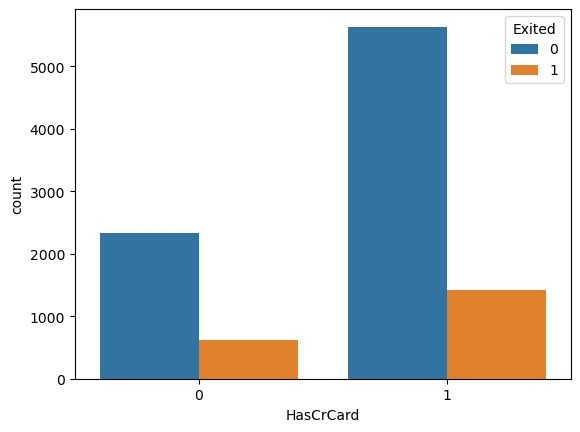

In [9]:
sns.countplot(df['HasCrCard'],hue=df['Exited'],data=df)

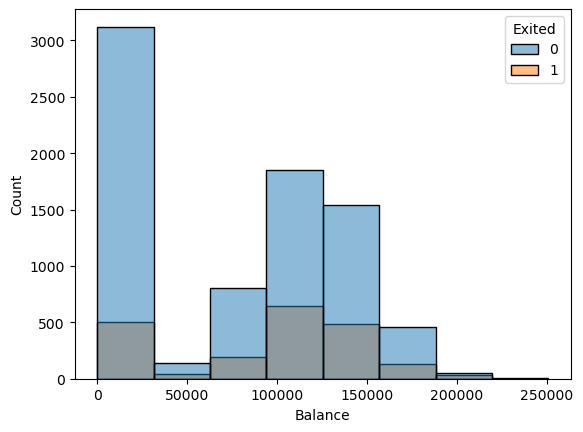

In [10]:
ax1 = sns.histplot(data=df, x=df["Balance"], bins=8,hue=df['Exited'])

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

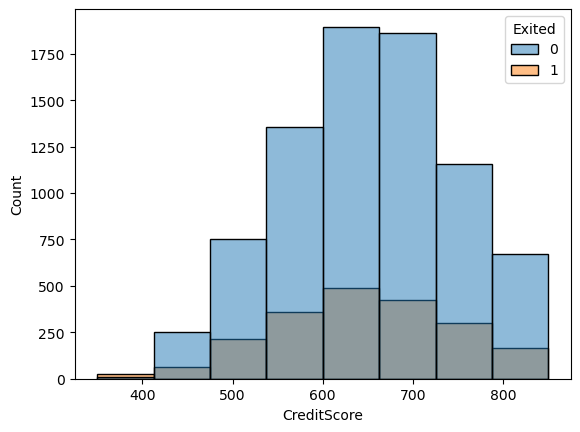

In [11]:
sns.histplot(data=df,x=df['CreditScore'],bins=8,hue=df['Exited'])

# Data Preparation for the model

In [12]:
df['Tenure'].unique().sum()

55

In [13]:
df['NumOfProducts'].unique().sum()

10

In [14]:
# Separating the categorical and continuous value.
cat_cols=['Geography',
       'Gender','NumOfProducts', 'HasCrCard',
       'IsActiveMember']
cont_cols=['CreditScore','Age','Balance','EstimatedSalary','Tenure']
y_col=['Exited']

In [15]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geography       10000 non-null  object
 1   Gender          10000 non-null  object
 2   NumOfProducts   10000 non-null  int64 
 3   HasCrCard       10000 non-null  int64 
 4   IsActiveMember  10000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 390.8+ KB


In [16]:
# Converting the categorical 
for col in cat_cols:
    df[col]=df[col].astype('category')

In [17]:
# Changes to dtype=category.
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Geography       10000 non-null  category
 1   Gender          10000 non-null  category
 2   NumOfProducts   10000 non-null  category
 3   HasCrCard       10000 non-null  category
 4   IsActiveMember  10000 non-null  category
dtypes: category(5)
memory usage: 49.6 KB


In [18]:
# Concatenating all the categorical values.
geo=df['Geography'].cat.codes.values
gdr=df['Gender'].cat.codes.values
nopr=df['NumOfProducts'].cat.codes.values
crdt=df['HasCrCard'].cat.codes.values
mbr=df['IsActiveMember'].cat.codes.values

cats=np.stack([geo,gdr,nopr,crdt,mbr],axis=1)
cats[:5]

array([[0, 0, 0, 1, 1],
       [2, 0, 0, 0, 1],
       [0, 0, 2, 1, 0],
       [0, 0, 1, 0, 0],
       [2, 0, 0, 1, 1]], dtype=int8)

In [19]:
cats.dtype

dtype('int8')

In [20]:
# Converting to tensor
cats=torch.tensor(cats,dtype=torch.int64)

In [21]:
# Concatenating all continuous values.
conts=np.stack([df[col].values for col in cont_cols],1)

In [22]:
conts.dtype

dtype('float64')

In [23]:
# Concatenating all continuous values.
conts=torch.tensor(conts,dtype=torch.float)

In [24]:
# Converting label to tensor.
y=torch.tensor(df[y_col].values).flatten()

In [25]:
# Assigning embedding sizes.
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(3, 2), (2, 1), (4, 2), (2, 1), (2, 1)]

# Applying the model

In [26]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [27]:
model=TabularModel(emb_szs,conts.shape[1],2,[100,80,200],0.4)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(2, 1)
    (2): Embedding(4, 2)
    (3-4): 2 x Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=80, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=80, out_features=200, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=200, out

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [29]:
batch_size = 7500
test_size = 2500

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [30]:
import time
start_time = time.time()

epochs = 400
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach())
    
    # To check the progress
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}',end="     ")
        rows = len(y_test)
        correct = 0

        for i in range(rows):
        #To know the each data set predicted and actual value.
        #     print(f'{str(y_val[i]):26} {y_val[i].argmax().item():^7}{y_test[i]:^7}')
            if y_pred[i].argmax().item() == y_test[i]:
                correct += 1

        print(f'Accuracy: {100*correct/rows:.2f}%')
        
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.84030896     Accuracy: 46.92%
epoch:  26  loss: 0.43911627     Accuracy: 75.12%
epoch:  51  loss: 0.41083315     Accuracy: 72.92%
epoch:  76  loss: 0.38933820     Accuracy: 72.68%
epoch: 101  loss: 0.39143190     Accuracy: 72.12%
epoch: 126  loss: 0.37801123     Accuracy: 72.68%
epoch: 151  loss: 0.37438774     Accuracy: 70.08%
epoch: 176  loss: 0.36806795     Accuracy: 71.60%
epoch: 201  loss: 0.36903471     Accuracy: 71.44%
epoch: 226  loss: 0.35797772     Accuracy: 71.44%
epoch: 251  loss: 0.35871732     Accuracy: 72.48%
epoch: 276  loss: 0.34947261     Accuracy: 71.68%
epoch: 301  loss: 0.35082629     Accuracy: 71.08%
epoch: 326  loss: 0.33841059     Accuracy: 72.52%
epoch: 351  loss: 0.34873360     Accuracy: 71.68%
epoch: 376  loss: 0.34125119     Accuracy: 72.16%
epoch: 400  loss: 0.34036839

Duration: 15 seconds


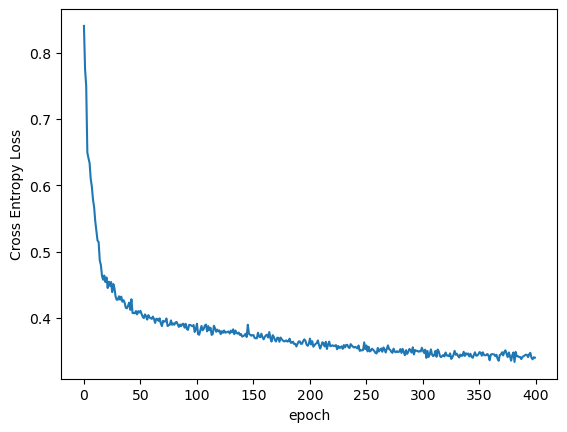

In [31]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [32]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.37716106



# Checking the performance of the model

In [33]:
rows = len(y_test)
correct = 0

for i in range(rows):
    #To know the each data set predicted and actual value.
#     print(f'{str(y_val[i]):26} {y_val[i].argmax().item():^7}{y_test[i]:^7}')

    if y_val[i].argmax().item() == y_test[i]:
        correct += 1

print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')


2118 out of 2500 = 84.72% correct


In [34]:
# WE CAN ACHIEVE THIS IN MORE SIMPLER WAY BY USING CV.

# epochs:300 [50,100] ,0.5,.001      --> 2041 out of 2500 = 81.64% correct
# epochs:400 [50,100,200],0.5,.001   --> 2082 out of 2500 = 83.28% correct
# epochs:400 [100,80,200],0.4,.01    --> 2112 out of 2500 = 84.48% correct
# epochs:400 [100,80,200],0.4,.1     --> 2113 out of 2500 = 84.52% correct

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
Y_val=[]

for i in range(len(y_val)):
    Y_val.append(y_val[i].numpy().argmax())

In [37]:
print(classification_report(y_test.numpy().reshape(-1,1),Y_val))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2000
           1       0.69      0.43      0.53       500

    accuracy                           0.85      2500
   macro avg       0.78      0.69      0.72      2500
weighted avg       0.83      0.85      0.83      2500



In [38]:
print(confusion_matrix(y_test.numpy().reshape(-1,1),Y_val))

[[1902   98]
 [ 284  216]]


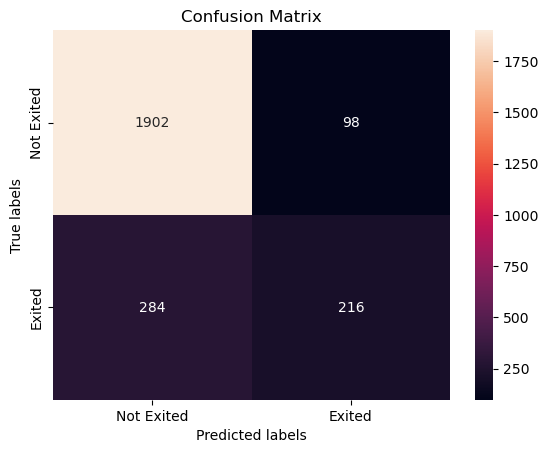

<Figure size 300x300 with 0 Axes>

In [39]:
ax= plt.subplot()
cm=confusion_matrix(y_test.numpy().reshape(-1,1),Y_val)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
plt.figure(figsize=(3,3))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Exited', 'Exited']); ax.yaxis.set_ticklabels(['Not Exited', 'Exited']);

In [54]:
import pickle

with open('churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Thank You